In [22]:
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk

from dask.distributed import Client
from dask_cuda import LocalCUDACluster

from abtem import FrozenPhonons, Probe, Potential

import os
os.environ["MKL_NUM_THREADS"] = "1"

from abtem import config
config.set({'device': 'gpu'})
config.set({'dask.lazy': True})

Runtime: 7.0 s per frozen phonon on 1 NVidia RTX 2080 Ti

In [9]:
cluster = LocalCUDACluster(memory_limit='10gb', n_workers=1)
client = Client(cluster)

C:\Users\jacob\anaconda3\envs\dask-gpu\lib\site-packages\dask_cuda\initialize.py:44: UserWarning: A CUDA context for device 0 already exists on process ID 20848. This is often the result of a CUDA-enabled library calling a CUDA runtime function before Dask-CUDA can spawn worker processes. Please make sure any such function calls don't happen at import time or in the global scope of a program.
  warnings.warn(
C:\Users\jacob\anaconda3\envs\dask-gpu\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53154 instead
  warnings.warn(
C:\Users\jacob\anaconda3\envs\dask-gpu\lib\site-packages\dask_cuda\utils.py:214: UserWarning: Cannot get CPU affinity for device with index 0, setting default affinity
  warnings.warn(


In [10]:
silicon = bulk('Si', crystalstructure='diamond', cubic=True)
silicon *= (74, 74, 100)

len(silicon)

4380800

In [19]:
frozen_phonons = FrozenPhonons(silicon, 4, {'Si':.1})

potential = Potential(frozen_phonons, gpts=2048, projection='infinite', slice_thickness=.5, device='gpu')

wave = Probe(energy=100e3, semiangle_cutoff=9.4, rolloff=0.)

In [20]:
measurement = wave.multislice(potential, positions=(0,0)).diffraction_patterns().mean(0)

In [21]:
%%time
measurement.compute()

Wall time: 37.2 s


(<AxesSubplot:xlabel='Scattering angle x [mrad]', ylabel='Scattering angle y [mrad]'>,
 <matplotlib.image.AxesImage at 0x202e42e4700>)

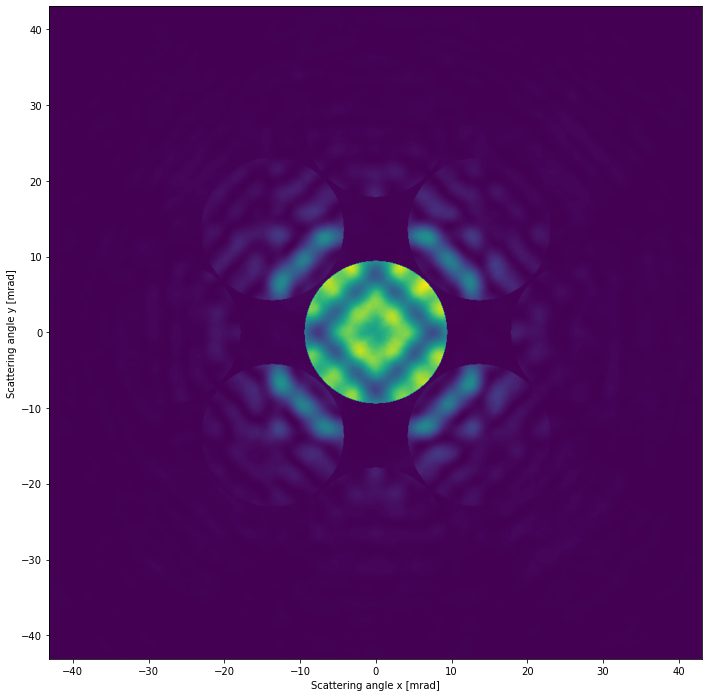

In [18]:
measurement.show(figsize=(12,12))